# Data Description

## About the data

You are working for a new-age insurance company and employ mutiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance. 

### Import libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd # read the csv files
import numpy as np # mathematical working of 2d arrays
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for plotting the variables

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score

### Load the dataset

In [3]:
dataset=pd.read_csv('train.csv') # read the csv file

### Data information

In [4]:
dataset.shape # get the no of rows and columns in the dataset

(45211, 11)

In [5]:
dataset.head() # first five columns of the dataset

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [6]:
dataset.info() # information about each column, each column's data type, count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [7]:
dataset.describe() # statistics of numerical data

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [8]:
dataset.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [9]:
(dataset.y.value_counts()['no']/45211)*100

88.30151954170445

* 88% of target variable contains 'no' as value.
###### this is highly ibalanced data
* We should balance the data before training the model.

In [10]:
for col in dataset.select_dtypes(include='object').columns: # select columns of string type 
    print(col) # print column name
    print(dataset[col].unique()) # each column's unique value

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education_qual
['tertiary' 'secondary' 'unknown' 'primary']
call_type
['unknown' 'cellular' 'telephone']
mon
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
prev_outcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


In [11]:
dataset['job']=dataset['job'].str.strip('.')

### Feature Description

##### Label

* y - has the client subscribed to insurance, dtype - 'object', categorical : ('yes', 'no')

# Data Cleaning

### Check for duplicates

In [12]:
dataset.duplicated().sum()

6

In [13]:
dataset=dataset.drop_duplicates(keep='last') # keep the last occurence

In [14]:
dataset.duplicated().sum()

0

* There are 6 duplicate rows in the dataset.
* since the count doesn't affect much to the total count, we can drop the duplicates.

### Check for structural errors 

In [15]:
dataset.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

* All the columns are in correct data format.

### Check for missing values

In [16]:
dataset.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

* We can see there are no missing values in the dataset.
* So there is no need to do any missing values imputation.

### Check for outliers

###### Age variable

In [17]:
dataset.age.describe()

count    45205.000000
mean        40.937087
std         10.619130
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

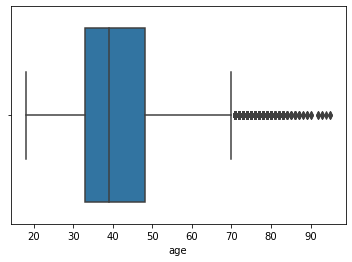

In [18]:
sns.boxplot(dataset.age)
plt.show()


In [131]:
# using IQR 
q3=dataset.age.quantile(0.75)
q1=dataset.age.quantile(0.25)
iqr=q3-q1
upper_threshold=q3+1.5*iqr
lower_threshold=q1-1.5*iqr
print(lower_threshold,upper_threshold)

10.5 70.5


In [47]:
dataset['age'][dataset['age']>70].count()

487

### Interpretation
* we only have 487 values out of 45211 values as outliers which are very less considerable.
* As we can see minimum value in age variable is not less than lower threshold.
* Upperthreshold and maximum value of age variable doesn't have much difference.
* We can keep these outliers

##### day variable

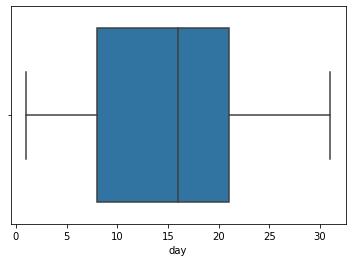

In [19]:
sns.boxplot(dataset.day)
plt.show()

### Interpretation
* no outliers in the day variable

##### duration variable

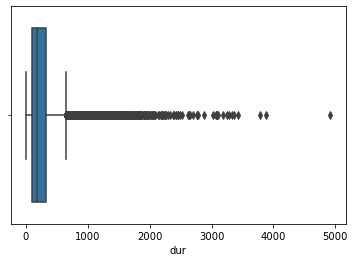

In [20]:
sns.boxplot(dataset.dur)
plt.show()

In [21]:
dataset.dur.describe()

count    45205.000000
mean       258.183055
std        257.538504
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: dur, dtype: float64

In [22]:
# using iqr
q3=dataset.dur.quantile(0.75)
q1=dataset.dur.quantile(0.25)
iqr=q3-q1
upper_threshold=q3+1.5*iqr
lower_threshold=q1-1.5*iqr
print(lower_threshold,upper_threshold)

-221.0 643.0


In [23]:
# clipping, since upper threshold is less than maximum value
dataset.dur=dataset.dur.clip(-221,643)

In [24]:
dataset.dur.describe()

count    45205.00000
mean       234.95620
std        176.75476
min          0.00000
25%        103.00000
50%        180.00000
75%        319.00000
max        643.00000
Name: dur, dtype: float64

### Interpretation
* clipping is done, since there is big difference between upper threshold and max value.

##### num_calls variable

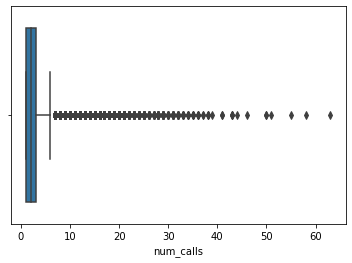

In [25]:
sns.boxplot(dataset.num_calls)
plt.show()

In [26]:
dataset.num_calls.describe()

count    45205.000000
mean         2.763898
std          3.098189
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: num_calls, dtype: float64

In [27]:
# IQR
q3=dataset.num_calls.quantile(0.75)
q1=dataset.num_calls.quantile(0.25)
iqr=q3-q1
upper_threshold=q3+1.5*iqr
lower_threshold=q1-1.5*iqr
print(lower_threshold,upper_threshold)

-2.0 6.0


In [28]:
dataset.num_calls=dataset.num_calls.clip(-2,6)

In [29]:
dataset.num_calls.describe()

count    45205.000000
mean         2.392235
std          1.600152
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: num_calls, dtype: float64

#### Interpretation
* clipping is done, since there is much difference between maximum and upper threshld

### Filling unknown values

###### job variable

In [143]:
dataset['job'].value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [31]:
(dataset.job.value_counts()['unknown']/dataset.shape[0]) *100

0.6370976661873686

#### Interpretation
* We got 288 unknown values in 'job' column, which is 0.6%  of total values, very very less percentage of values.
* We can either drop the rows or keep the unknown values as a category.
* Data is lost whenever a count of rows is dropped.
* Instead of dropping the data, we keep the unknown values as a category.

###### marital variable

In [32]:
dataset.marital.value_counts()

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

* There are no unknown values.

###### education_qual

In [33]:
dataset.education_qual.value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

In [34]:
(dataset.education_qual.value_counts()["unknown"]/dataset.shape[0])*100

4.107952660103971

#### Interpretation
* Dataset contains 1857 unknown values for 'education_qual' column, which is 4% of total data, less percentage of data.
* We can either drop the rows or keep the unknown values.
* Data is lost whenever a count of rows is dropped.
* Instead of dropping the data, we keep the unknown values.

#### call_type variable

In [35]:
dataset.call_type.value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

In [36]:
(dataset.call_type.value_counts()['unknown']/dataset.shape[0])*100

28.79548722486451

* 28% of call_type values are unknown values, which is very much considerable.
* Instead of imputing the unknown value, it should be considered as a category.

#### prev_outcome

In [37]:
dataset.prev_outcome.value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [38]:
(dataset.prev_outcome.value_counts()['unknown']/dataset.shape[0])*100

81.74538214799247

* 81% of prev_outcome values are unknown.
* unknown should be considered as a category.

# Exploratory Data Analysis
Interpreting, summarizing and visualizing the dataset

### Visualizing the target variable

In [39]:
def countplot(label, data):
  plt.figure(figsize=(10,5))
  Y = data[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset)
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

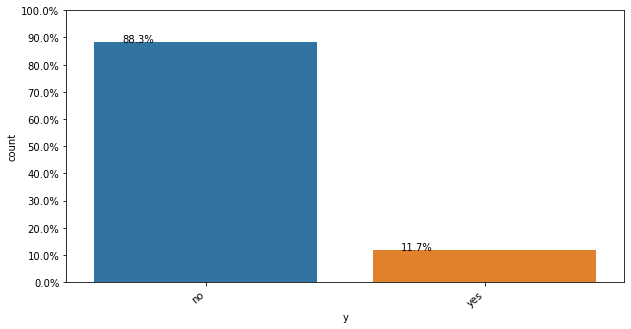

In [40]:
# target variable 'y'
countplot('y',dataset)

###### From the above plot, we can see customers who responded or who turned out for term deposit only consist 11.7%  of total customers. When a call to customer is made, only few customers will seriously consider that. 
###### This is highly imbalanced classification target

### How people with different Jobs responded to telemarketing campaign

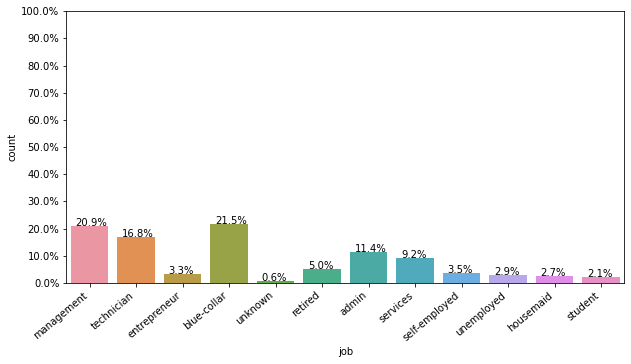

In [41]:
countplot("job",dataset)

###### Most of the customers are from 'blue-collar' job type,it is followed by 'management' job type and then 'technician'.  5-12% of customers are from 'services', 'retired','admin' job type.  less than 5% of customers are from 'self-employed', 'unemployed', 'housemaid', 'student'.

In [42]:
dataset['target']=dataset.y.map({'yes':1,"no":0})

<AxesSubplot:ylabel='job'>

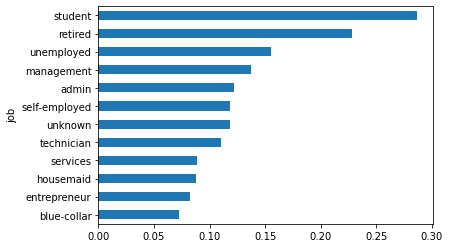

In [43]:
dataset.groupby("job")["target"].mean().sort_values().plot(kind='barh')

#### Interpretation
* Most customers subsribed for insurance are 'students' and the next are 'retired' people. This may be due to students try to take invest in term deposit until their tuitin after graduation. Customers who are employed likely have their money in investments rather in term deposit.
* 'unemployed' and 'management' people subscibed in good percentage.
* from the first plot, most customers who are contacted are of 'blue-collar' type, it can also be seen that least number of customers who subsribed are of 'blue-collar' type.
* Least contacted customers are students, but more customers who subscribed for insurance are students.
* only 5% customers are of retired but, second most customers subscribed for insurance are retired people.
* It is the same way for unemployed and self employed job type.
* Second most contacted customers are of 'management' type, but they are not most subscribed.
##### Changes for most subsciptions to insurance
* Most contacts should be done for student type.
* Decrease the contacts for 'blue-collar' type.
* Increase the contacts for student, retired, unemployed and management type.
* Focus less on blue-collar, entrepreneur, housemaid and services.


### Does marital status affect customer decision to take insurance

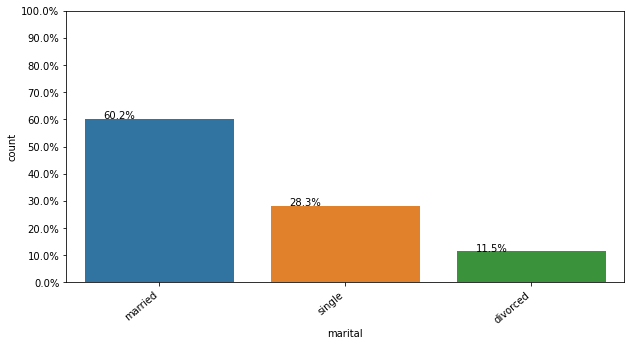

In [44]:
countplot('marital',dataset)

<AxesSubplot:ylabel='marital'>

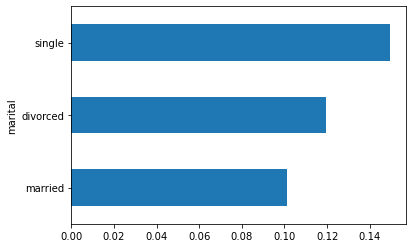

In [45]:
dataset.groupby('marital')['target'].mean().sort_values().plot(kind='barh')

#### Interpretation
* Most customers are married,least customers are divorced.
* Customers who subscribed more are single.
* followed by divorced people who subscribed more.
* least no of customers who turned for subscriptions are married.
##### Changes for most subscriptions to insurance
* Increase the customers who are single.
* Focus less on people who are married.
* Increase focus on divorced people.

### Does customer education qualification matter in conversion rate for term deposit

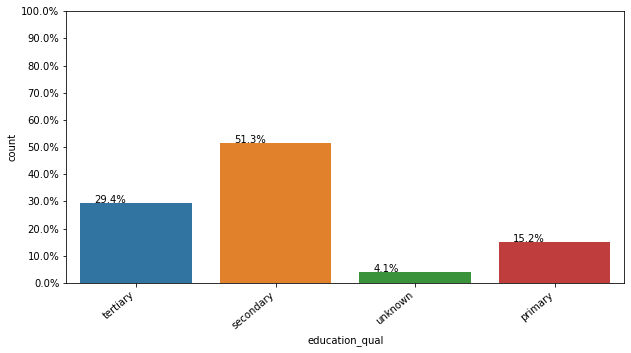

In [163]:
countplot('education_qual',dataset)

<AxesSubplot:ylabel='education_qual'>

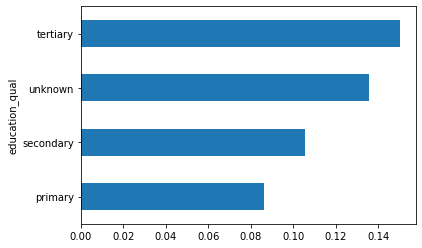

In [164]:
dataset.groupby("education_qual")['target'].mean().sort_values().plot(kind='barh')

### Interpretation
* most customers are of secondary education.
* most customers who turned for subsriptions are tertiary.
* least customers are of unknown data type, but second most no of customers who subscribed are unknown category type.
* least number of customers who subscribed are of primary type.
##### changes for most subscriptions to insurance
* Increase contact for tertiary customers.
* focus less on primary education.
* unknown category has turned into a great percentage of subscription.

### Does the mode of telephonic contact affect the campaign

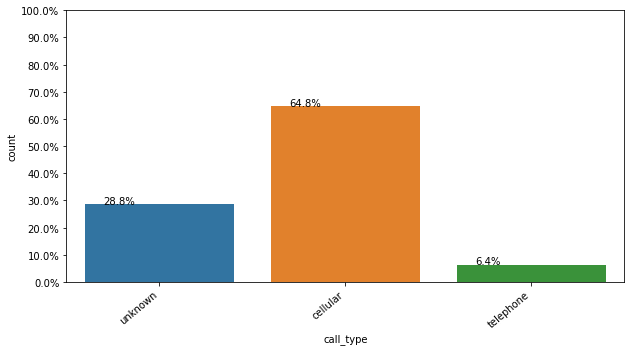

In [165]:
countplot("call_type",dataset)

<AxesSubplot:ylabel='call_type'>

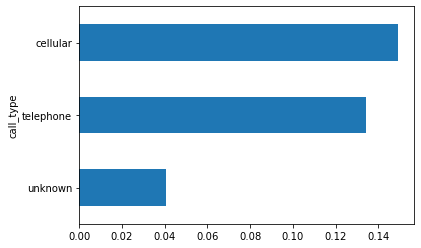

In [166]:
dataset.groupby('call_type')['target'].mean().sort_values().plot(kind='barh')

### Interpretation
* Most customers are of cellular type, followed by unknown type.
* Most customers who turned for subscriptions are of cellular type.
* Least number customers are of telephone type, but they turned for subscriptions.
* Least number of customers who turned for subscriptions are of unknown type.
##### changes for most subscriptions to insurance
* increase customers in cellular type.
* focus less on unknown type.
* increase focus on telephone type.
###### points
* Nowadays, most people are accessing Mobile Phones, which are cellular type.
* Accessing customers with Mobile Phones are quite easy rather than telephone type.

### Period of a year like Month

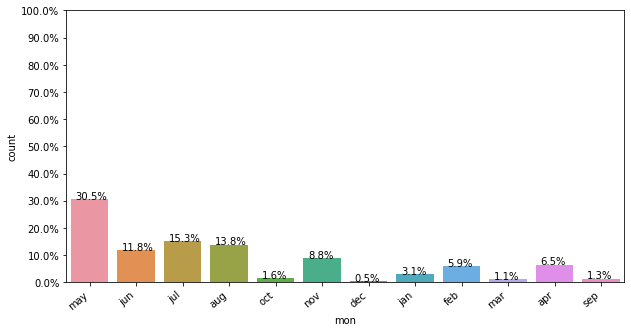

In [167]:
countplot("mon",dataset)

<AxesSubplot:ylabel='mon'>

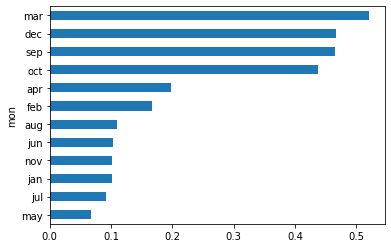

In [168]:
dataset.groupby("mon")['target'].mean().sort_values().plot(kind='barh')

### Interpretation
* Most customers are contacted in May month followed by july, august and june.
* Least number of number of customers are contacted in december followed by march, september and october.
* Customers subscribed more in march month followed by december.
* It can also be seen that customers are contacted very less in march and least in december , but they turned out for more subscriptions.
##### Changes to increase subsriptions
* Increase the contact to customers in March and December, September,October.
* Decrease the contact to customers in May, July,August.

### Does previous campaign outcome affect the next campaign outcome

In [169]:
poutcome=dataset.prev_outcome.value_counts(normalize=True)*100
poutcome

unknown    81.745382
failure    10.841721
other       4.070346
success     3.342551
Name: prev_outcome, dtype: float64

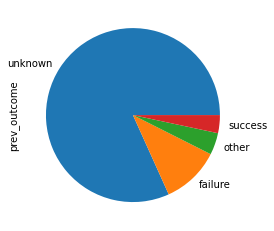

In [170]:
poutcome.plot.pie()
plt.show()

<AxesSubplot:ylabel='prev_outcome'>

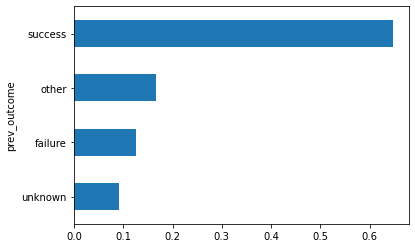

In [171]:
dataset.groupby("prev_outcome")['target'].mean().sort_values().plot(kind='barh')

### Interpretation
* most number of customers have unknown i.e it is neither failure nor success as their prev outcome.
* If the previous outcome is success, there is a greater chance for subscription in next campaign.
* If the previous outcome is unknown, there is very less chance for subscription in next campaign.


### Customers of different age keep money in insurance

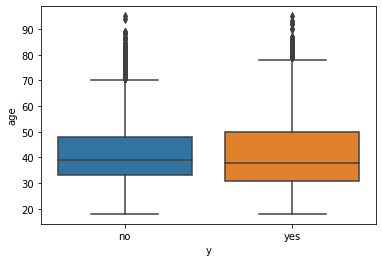

In [172]:
%matplotlib inline
sns.boxplot(x='y',y='age',data=dataset)
plt.show()

Text(0, 0.5, 'conversion rate')

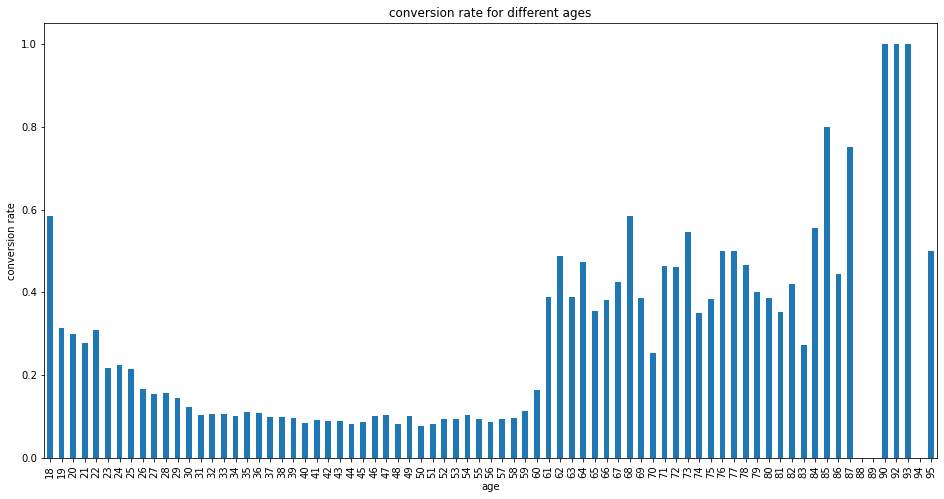

In [173]:
plt.figure(figsize=(16,8))
dataset.groupby('age')['target'].mean().plot(kind='bar')
plt.title("conversion rate for different ages")
plt.xlabel("age")
plt.ylabel('conversion rate')

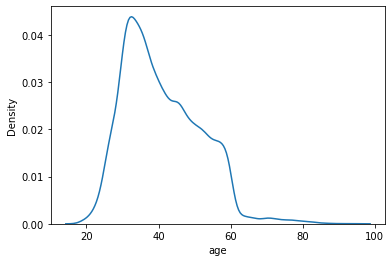

In [174]:
sns.kdeplot(dataset['age'])
plt.show()

### Interpretation
* From the above distribution most of the customers are from age between 30-40.
* From the above box plot we can see that both customers who took insurance and who didn't has a median age of around 38-40.
* We can also say that box plot of both the classes overlap quite a lot.

### Does call duration impact the outcome

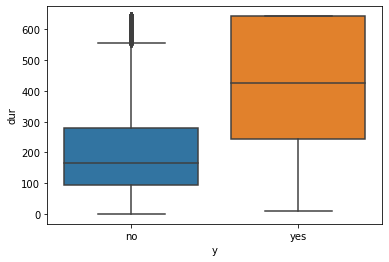

In [175]:
%matplotlib inline
sns.boxplot(x='y',y='dur',data=dataset)
plt.show()

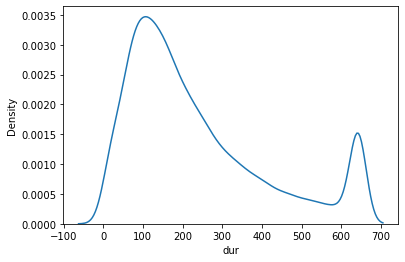

In [176]:
sns.kdeplot(dataset['dur'])
plt.show()

### Interpretation
* Most values are very low and very few values have high duration.
* From the above plot it is clear that last contact duration affects the target in a high way.
* As duration increases, the chances of customers going for insurance increases.

### When customers tend to say 'yes' is it at the start or end of the month

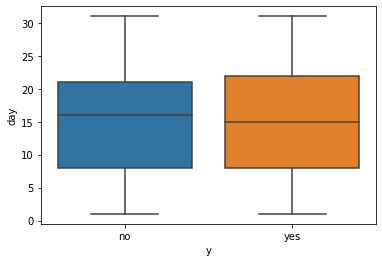

In [177]:
sns.boxplot(x='y',y='day',data=dataset)
plt.show()

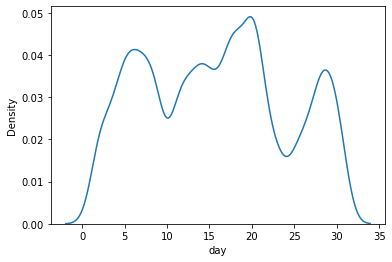

In [178]:
sns.kdeplot(dataset['day'])
plt.show()

### Interpretation
* Both the classes overlap equally.
* From the plot, high number of customers got contacted in the middle of month.
* second week of month has lows and ups, but there is much increase in the number of customers got contacted in middle of month.

### Does contacting more (num of calls) probes the customer to say 'yes'

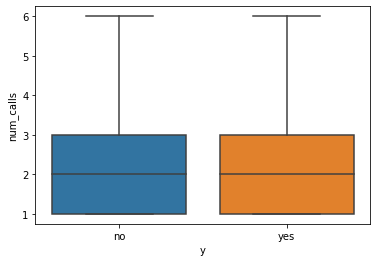

In [179]:
sns.boxplot(x='y',y='num_calls',data=dataset)
plt.show()

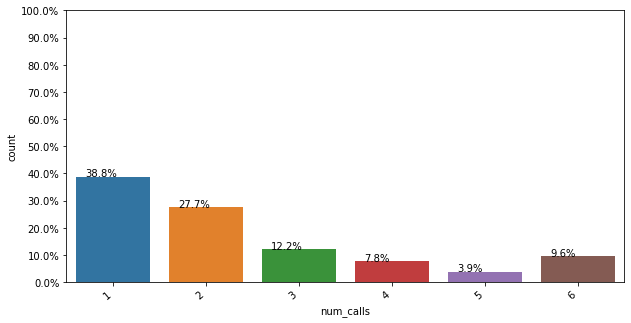

In [180]:
countplot('num_calls',dataset)

<AxesSubplot:ylabel='num_calls'>

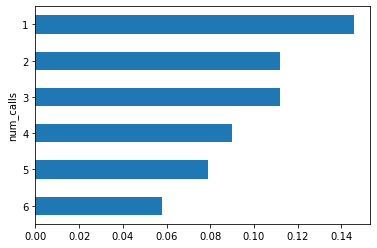

In [181]:

dataset.groupby("num_calls")['target'].mean().sort_values().plot(kind='barh')

### Interpretation
* Both classes got overlapped equally.
* As number of calls increases the positive response rate decreases.
* Customer turning for insurance or bank is high in the first call.

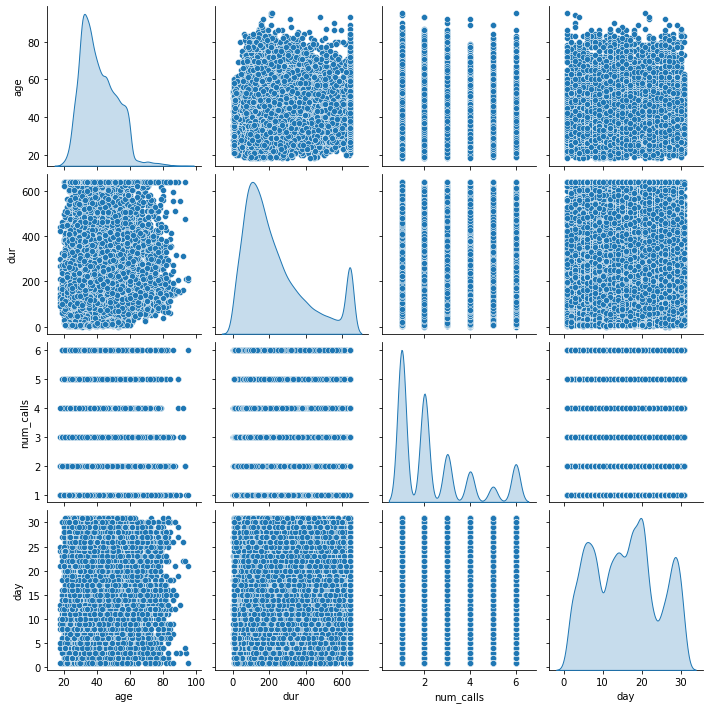

In [52]:
sns.pairplot(dataset[['age','dur','num_calls','day']],diag_kind='kde')

<AxesSubplot:>

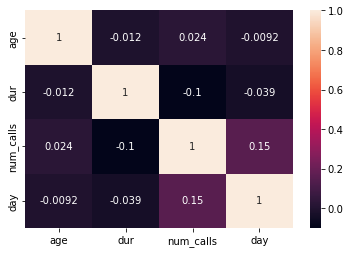

In [53]:
sns.heatmap(dataset[['age','dur','num_calls','day']].corr(),annot=True)

* no numerical column is more correlated to another numerical column.

### Multivariate analysis

In [64]:
education_marital_relation=dataset.pivot_table(index='education_qual',columns='marital',values='target')

In [65]:
education_marital_relation

marital,divorced,married,single
education_qual,,,
primary,0.138298,0.075500,0.106682
secondary,0.103375,0.094712,0.129232
tertiary,0.138001,0.129743,0.183678
unknown,0.142012,0.122414,0.162879


<AxesSubplot:xlabel='marital', ylabel='education_qual'>

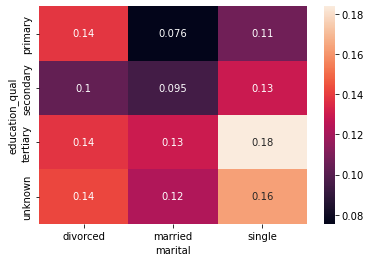

In [66]:
sns.heatmap(education_marital_relation,annot=True)

* single and tertiary education has highest realtion of 0.18, followed by single and unknown which has 0.16 relation with other.

In [62]:
marital_and_job=dataset.pivot_table(index='marital',columns='job',values='target')

In [63]:
marital_and_job

job,admin,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
marital,,,,,,,,,,,,
divorced,0.120000,0.077333,0.083799,0.097826,0.127813,0.284706,0.157143,0.091075,0.166667,0.083243,0.157895,0.058824
married,0.113628,0.062733,0.075701,0.073465,0.126134,0.220682,0.079557,0.073982,0.185185,0.102665,0.132695,0.103448
single,0.136074,0.105760,0.113445,0.166667,0.162199,0.120370,0.192825,0.117696,0.293850,0.132493,0.194514,0.176471


<AxesSubplot:xlabel='job', ylabel='marital'>

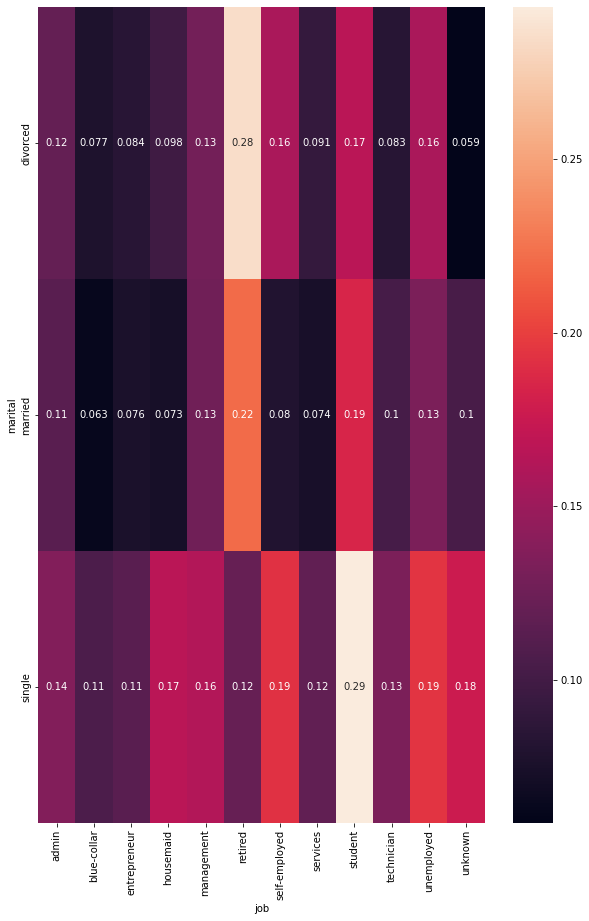

In [69]:
plt.figure(figsize=(10,15))
sns.heatmap(marital_and_job,annot=True)

* single and student customers have higher conversion rates than pthers they have a relation of 0.29
* divorced and retired people have conversion rates greater than other customers they have a realtion of 0.28 second highest among others.

## Encoding

Need to transform all categorical vriables into numerical forms

##### Target variable 'y'

In [61]:
dataset.y=dataset.y.map({'no':0,'yes':1})

In [183]:
dataset=dataset.drop(['target'],axis=1)

In [184]:
dataset.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,0


In [185]:
dataset.y.value_counts()

0    39916
1     5289
Name: y, dtype: int64

#### Education_qual variable
* we can do label encoding for education qualification, since it appears in order

In [186]:
dataset['education_qual'].value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

In [187]:
dataset['education_qual']=dataset['education_qual'].map({'tertiary':3,'secondary':1,'primary':0,'unknown':2})

In [188]:
dataset

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,3,unknown,5,may,261,1,unknown,0
1,44,technician,single,1,unknown,5,may,151,1,unknown,0
2,33,entrepreneur,married,1,unknown,5,may,76,1,unknown,0
3,47,blue-collar,married,2,unknown,5,may,92,1,unknown,0
4,33,unknown,single,2,unknown,5,may,198,1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,3,cellular,17,nov,643,3,unknown,1
45207,71,retired,divorced,0,cellular,17,nov,456,2,unknown,1
45208,72,retired,married,1,cellular,17,nov,643,5,success,1
45209,57,blue-collar,married,1,telephone,17,nov,508,4,unknown,0


#### call_type variable

* Label Encoding

In [189]:
dataset['call_type'].value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

In [190]:
dataset['call_type']=dataset['call_type'].map({'cellular':2,'telephone':1,'unknown':0})

##### marital status

We are doing one hot encoding for marital status.

In [191]:
dataset.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,3,0,5,may,261,1,unknown,0
1,44,technician,single,1,0,5,may,151,1,unknown,0
2,33,entrepreneur,married,1,0,5,may,76,1,unknown,0
3,47,blue-collar,married,2,0,5,may,92,1,unknown,0
4,33,unknown,single,2,0,5,may,198,1,unknown,0


In [192]:
dataset['marital']=dataset['marital'].map({'married':0,'divorced':1,'single':2})

#### Job variable

* From the plot of job type, student, retired, unemployed and manaagement are the top four in converting for subscriptions.
* An order can be observed with respect to target variable.
* Label encoding is applied to Job variable.

In [193]:
dataset['job'].value_counts()

blue-collar      9730
management       9457
technician       7596
admin            5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [194]:
dataset['job']=dataset.job.map({'blue-collar':int(0),'entrepreneur':int(1),'housemaid':int(2),'services':int(3),'technician':int(4),'unknown':int(5),'self-employed':int(6),'admin':int(7),'management':int(8),'unemployed':int(9),'retired':int(10),'student':int(11)})

In [195]:
dataset.job.value_counts()

0     9730
8     9457
4     7596
7     5170
3     4153
10    2264
6     1579
1     1487
9     1303
2     1240
11     938
5      288
Name: job, dtype: int64

In [196]:
dataset.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,8,0,3,0,5,may,261,1,unknown,0
1,44,4,2,1,0,5,may,151,1,unknown,0
2,33,1,0,1,0,5,may,76,1,unknown,0
3,47,0,0,2,0,5,may,92,1,unknown,0
4,33,5,2,2,0,5,may,198,1,unknown,0


##### Month column
 From the eda, we can see that, month feature has also order for turning out for more subscriptions.
 Here we are using Target encoding, correlating the labels with target variable.

In [197]:
dataset.mon.value_counts()

may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [198]:
dataset['mon']=dataset['mon'].map({'may':0,'jul':1,'jan':2,'nov':3,'jun':4,'aug':5,'feb':6,'apr':7,'oct':8,'sep':9,'dec':10,'mar':11})

In [199]:
dataset.mon.value_counts()

0     13765
1      6894
5      6245
4      5339
3      3970
7      2932
6      2649
2      1403
8       738
9       579
11      477
10      214
Name: mon, dtype: int64

#### previous_outcome

* There is also an order for previous outcome with target variable.
* Label encoding is done for previous outcome.

In [200]:
dataset['prev_outcome']=dataset.prev_outcome.map({'unknown':0,'failure':1,'other':2,'success':3})

In [201]:
dataset.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,8,0,3,0,5,0,261,1,0,0
1,44,4,2,1,0,5,0,151,1,0,0
2,33,1,0,1,0,5,0,76,1,0,0
3,47,0,0,2,0,5,0,92,1,0,0
4,33,5,2,2,0,5,0,198,1,0,0


In [202]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45205 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             45205 non-null  int64
 1   job             45205 non-null  int64
 2   marital         45205 non-null  int64
 3   education_qual  45205 non-null  int64
 4   call_type       45205 non-null  int64
 5   day             45205 non-null  int64
 6   mon             45205 non-null  int64
 7   dur             45205 non-null  int64
 8   num_calls       45205 non-null  int64
 9   prev_outcome    45205 non-null  int64
 10  y               45205 non-null  int64
dtypes: int64(11)
memory usage: 5.1 MB


## Splitting of data 

In [203]:
# features=['age','education_qual','job','mon','marital','num_calls','prev_outcome','day']
X=dataset.drop(['y'],axis=1) # features
y=dataset['y'] # target variable

In [204]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y,random_state=11) # 25% test data and 75% train data

In [205]:
len(X_train),len(X_test) # no of rows in respective dataframes

(33903, 11302)

In [206]:
len(y_train)

33903

In [207]:
X_test

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome
10592,36,9,2,1,0,16,4,265,3,0
4839,31,0,2,1,0,21,0,353,1,0
44534,75,10,0,1,2,12,5,350,1,3
26050,33,8,2,3,2,19,3,643,3,1
647,31,11,2,1,0,6,0,175,3,0
...,...,...,...,...,...,...,...,...,...,...
32118,28,4,2,3,2,15,7,217,2,0
22955,51,0,0,0,2,26,5,26,6,0
30300,26,1,2,1,2,5,6,643,1,1
12918,28,3,2,1,2,7,1,159,1,0


## Balancing of data

<AxesSubplot:xlabel='y', ylabel='count'>

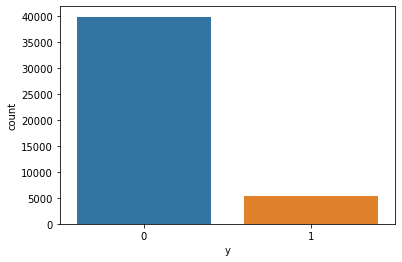

In [208]:

sns.countplot(dataset['y'])

* There is a huge difference between class 1 and class 0 of target variable.
* We solve this issue, by resampling the data.

#### About balancing of data 
* There are many methods for balancing the data in classification by oversampling the minority class or undersampling the majority class.
* A better model to choose that combines both undersampling and oversampling to balance the dataset better.
* Combining SMOTE and ENN for better balancing of data.
* Both SMOTE and ENN uses K nearest neighbor(KNN) model.
##### SMOTE
* SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.
##### ENN
* ENN(Edited Nearest Neighbor) works by finding the K-Nearest Neighbor of each observation first, then check the majority class from the observation's K nearest neighbor is the same as the observation class.
* If they are same, return the majority from KNN.
* If they are not same, both the observation and KNN is deleted from the data.


In [209]:
import imblearn # toolbox for imbalanced datasets

In [210]:
from imblearn.combine import SMOTEENN

In [211]:
smt=SMOTEENN(sampling_strategy='all')
X_smt,y_smt=smt.fit_resample(X_train,y_train)

In [212]:
from collections import Counter
print("original data: ",Counter(y_train))
print("resampled data: ",Counter(y_smt))

original data:  Counter({0: 29936, 1: 3967})
resampled data:  Counter({1: 28355, 0: 21930})


<AxesSubplot:xlabel='y', ylabel='count'>

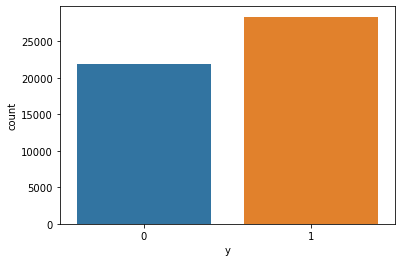

In [213]:
sns.countplot(y_smt)

In [214]:
X_smt

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome
0,32,4,2,1,0,28,0,267,4,0
1,46,4,2,1,2,19,5,42,1,0
2,46,3,0,1,0,14,0,380,4,0
3,55,8,0,2,1,27,2,100,1,1
4,49,8,0,3,2,30,1,258,2,0
...,...,...,...,...,...,...,...,...,...,...
50280,61,7,0,1,2,25,1,338,1,1
50281,70,10,0,1,1,11,9,123,1,0
50282,51,4,0,1,2,19,6,439,1,0
50283,58,10,0,3,2,13,0,642,4,0


* not considerable difference between two classes.

## Model Fitting

### Logistic Regression

In [215]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score,roc_auc_score

model=LogisticRegression()
model.fit(X_smt,y_smt)
prediction=model.predict(X_test)

f1score_log=f1_score(y_test,prediction)
accuracy_log=accuracy_score(y_test,prediction)
auroc_score_log=roc_auc_score(y_test,model.predict_proba(X_test)[:,1])

print("F1 score: ",f1score_log)
print("accuracy score: ",accuracy_log)
print("auroc score: ",auroc_score_log)


F1 score:  0.427570954662735
accuracy score:  0.7251813838258715
auroc score:  0.8641760828767975


### RandomForestClassifier

In [216]:
from sklearn.ensemble import RandomForestClassifier
Random_forest=RandomForestClassifier()

Random_forest.fit(X_smt,y_smt)
prediction=Random_forest.predict(X_test)

auroc_score_rfc=roc_auc_score(y_test,Random_forest.predict_proba(X_test)[:,1])
F1_Score_rfc=f1_score(y_test,prediction)
accuracy_rfc=accuracy_score(y_test,prediction)

print("accuracy score: ",accuracy_rfc)
print("F1 score: ",F1_Score_rfc)
print("AUROC score: ",auroc_score_rfc)


accuracy score:  0.8370199964608034
F1 score:  0.5572115384615384
AUROC score:  0.9148118854956508


### KNeighborsClassifier

In [218]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_fit=scaler.fit(X_train)
X_smt_scaled=scaler.transform(X_smt)
X_test_scaled=scaler.transform(X_test)

In [219]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()

In [225]:
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
    knn=KNeighborsClassifier(i)
    knn.fit(X_smt_scaled,y_smt)
    print("K value: ",i," train score :",knn.score(X_smt_scaled,y_smt)," cv score: ",np.mean(cross_val_score(knn,X_test,y_test,cv=10)))

K value:  1  train score : 1.0  cv score:  0.8551600510160167
K value:  2  train score : 0.9852441085810878  cv score:  0.8804639953678709
K value:  3  train score : 0.9684200059659939  cv score:  0.8733863837312115
K value:  4  train score : 0.9665108879387492  cv score:  0.8810828384310228
K value:  5  train score : 0.9572437108481655  cv score:  0.8806405170457656
K value:  6  train score : 0.9573033707865168  cv score:  0.8835603233100944
K value:  7  train score : 0.9523317092572338  cv score:  0.884445435553156
K value:  8  train score : 0.9512777170130258  cv score:  0.8846222702127493
K value:  9  train score : 0.9464850352987969  cv score:  0.8856838258882812
K value:  10  train score : 0.9459480958536343  cv score:  0.884445279062307
K value:  20  train score : 0.9340757681217062  cv score:  0.8855954085584846
K value:  50  train score : 0.9195187431639654  cv score:  0.883649523094137


In [228]:
KNN=KNeighborsClassifier(9)

KNN.fit(X_smt_scaled,y_smt)
prediction=KNN.predict(X_test_scaled)

auroc_score_knn=roc_auc_score(y_test,KNN.predict_proba(X_test_scaled)[:,1])
F1_Score_knn=f1_score(y_test,prediction)
accuracy_knn=accuracy_score(y_test,prediction)

print("accuracy score: ",accuracy_knn)
print("F1 score: ",F1_Score_knn)
print("AUROC score: ",auroc_score_knn)

accuracy score:  0.7892408423287913
F1 score:  0.49597968683876426
AUROC score:  0.8862716734528058


### Decision Tree

In [229]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [230]:
for i in [1,2,3,4,5,6,7,8,9,10,20]:
    dt=DecisionTreeClassifier(max_depth=i)
    dt.fit(X_smt,y_smt)
    trainAccuracy=accuracy_score(y_smt,dt.predict(X_smt))
    valAccuracy=cross_val_score(dt,X_test,y_test,cv=10)
    print("Depth: ",i,'Training accuracy: ',trainAccuracy,"cross val score: ",np.mean(valAccuracy))

Depth:  1 Training accuracy:  0.7892413244506314 cross val score:  0.8821447070882529
Depth:  2 Training accuracy:  0.8080342050313215 cross val score:  0.8894009530292715
Depth:  3 Training accuracy:  0.8592224321368201 cross val score:  0.897629476616355
Depth:  4 Training accuracy:  0.870776573530874 cross val score:  0.9006374654742064
Depth:  5 Training accuracy:  0.8837625534453615 cross val score:  0.9005492828806835
Depth:  6 Training accuracy:  0.8976434324351198 cross val score:  0.9001077439496725
Depth:  7 Training accuracy:  0.9084219946306056 cross val score:  0.8977181286824252
Depth:  8 Training accuracy:  0.9186238440886945 cross val score:  0.8946205488134081
Depth:  9 Training accuracy:  0.9300984388982798 cross val score:  0.890639891082369
Depth:  10 Training accuracy:  0.9383712836830068 cross val score:  0.887365398308334
Depth:  20 Training accuracy:  0.9964999502833847 cross val score:  0.871616785208485


In [232]:
Decision_Tree=DecisionTreeClassifier(max_depth=4)

Decision_Tree.fit(X_smt,y_smt)
prediction=Decision_Tree.predict(X_test)

auroc_score_dt=roc_auc_score(y_test,Decision_Tree.predict_proba(X_test)[:,1])
F1_Score_dt=f1_score(y_test,prediction)
accuracy_dt=accuracy_score(y_test,prediction)
print("accuracy score: ",accuracy_dt)
print("F1 score: ",F1_Score_dt)
print("AUROC score: ",auroc_score_dt)

accuracy score:  0.7613696690851177
F1 score:  0.45504142250959795
AUROC score:  0.8517112515499985


### XGBoost Classifier

In [233]:
from xgboost import XGBClassifier

In [234]:
for lr in[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.20,0.50,0.75,1]:
    xgb=XGBClassifier(learning_rate=lr,n_estimators=100,verbosity=0)
    xgb.fit(X_smt,y_smt)
    val_accuracy=cross_val_score(xgb,X_test,y_test,cv=10)
    print('Learning rate: ',lr,'Train Score: ',xgb.score(X_smt,y_smt),'cv: ',np.mean(val_accuracy))

Learning rate:  0.01 Train Score:  0.9155016406483046 cv:  0.9027614375249406
Learning rate:  0.02 Train Score:  0.9244904046932485 cv:  0.9032924109762682
Learning rate:  0.03 Train Score:  0.9307546982201452 cv:  0.9024077682057543
Learning rate:  0.04 Train Score:  0.9372775181465646 cv:  0.9030265330234813
Learning rate:  0.05 Train Score:  0.9427264591826588 cv:  0.9038223672370757
Learning rate:  0.06 Train Score:  0.9466441284677339 cv:  0.9028492288913406
Learning rate:  0.07 Train Score:  0.9497862185542408 cv:  0.9014336126694993
Learning rate:  0.08 Train Score:  0.9531868350402705 cv:  0.9009028739544455
Learning rate:  0.09 Train Score:  0.9562891518345431 cv:  0.9001949093526755
Learning rate:  0.1 Train Score:  0.9585562294918962 cv:  0.9007261175402768
Learning rate:  0.11 Train Score:  0.95957044844387 cv:  0.900991526020516
Learning rate:  0.12 Train Score:  0.9604454608730237 cv:  0.9019645861208266
Learning rate:  0.13 Train Score:  0.9626329919459083 cv:  0.9029378

In [237]:
xgb=XGBClassifier(lr=0.05,n_estimators=100,verbosity=0)
xgb.fit(X_smt,y_smt)

prediction=xgb.predict(X_test)

auroc_score_xg=roc_auc_score(y_test,xgb.predict_proba(X_test)[:,1])
F1_Score_xg=f1_score(y_test,prediction)
accuracy_xg=accuracy_score(y_test,prediction)

In [238]:
print("accuracy score: ",accuracy_xg)
print("F1 score: ",F1_Score_xg)
print("AUROC score: ",auroc_score_xg)

accuracy score:  0.8402937533179968
F1 score:  0.5598634479395269
AUROC score:  0.9158075227611047


## Evaluation

In [239]:
ind=['Loistic Regression','RandomForestClassifier','KneighborsClassifier','Decision Tree','Xgboost']
data={'Accuracy':[accuracy_log,accuracy_rfc,accuracy_knn,accuracy_dt,accuracy_xg],
      'F1 score':[f1score_log,F1_Score_rfc,F1_Score_knn,F1_Score_dt,F1_Score_xg],
      'AUROC Score':[auroc_score_log,auroc_score_rfc,auroc_score_knn,auroc_score_dt,auroc_score_xg]}
result=pd.DataFrame(data=data,index=ind)
result


,Accuracy,F1 score,AUROC Score
Loistic Regression,0.725181,0.427571,0.864176
RandomForestClassifier,0.837020,0.557212,0.914812
KneighborsClassifier,0.789241,0.495980,0.886272
Decision Tree,0.761370,0.455041,0.851711
Xgboost,0.840294,0.559863,0.915808


From above models, XGBoost has highest AUROC score, we can prefer XGBoost model for this problem statement.

### Feature Importances

In [240]:
importances=xgb.feature_importances_

In [241]:
cols=list(X_train.columns)

In [242]:
feature_importances=pd.DataFrame({'features':cols,'feature_importance':importances})

In [243]:
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
4,call_type,0.218839
7,dur,0.205246
6,mon,0.167177
9,prev_outcome,0.122049
8,num_calls,0.069949
1,job,0.053357
5,day,0.047072
3,education_qual,0.044792
2,marital,0.038643
0,age,0.032876


removing column 'age', we can see how it affects the model

In [245]:
X=dataset.drop(['y','age'],axis=1)
y=dataset['y']

In [246]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y)

In [247]:
smt=SMOTEENN(sampling_strategy='all')
X_smt,y_smt=smt.fit_resample(X_train,y_train)

In [250]:
xgb=XGBClassifier(lr=0.05,n_estimators=100,verbosity=0)
xgb.fit(X_smt,y_smt)

prediction=xgb.predict(X_test)

auroc_score_xg=roc_auc_score(y_test,xgb.predict_proba(X_test)[:,1])
F1_Score_xg=f1_score(y_test,prediction)
accuracy_xg=accuracy_score(y_test,prediction)

In [251]:
print("accuracy score: ",accuracy_xg)
print("F1 score: ",F1_Score_xg)
print("AUROC score: ",auroc_score_xg)

accuracy score:  0.8320651212174837
F1 score:  0.5430909966297545
AUROC score:  0.909934392233787


There is a very slight decrease in auroc score.

Lets try removing marital along with age

In [252]:
X=dataset.drop(['y','marital','age'],axis=1)
y=dataset['y']

In [253]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y)

In [254]:
smt=SMOTEENN(sampling_strategy='all')
X_smt,y_smt=smt.fit_resample(X_train,y_train)

In [255]:
xgb=XGBClassifier(lr=0.05,n_estimators=100,verbosity=0)
xgb.fit(X_smt,y_smt)

prediction=xgb.predict(X_test)

auroc_score_xg=roc_auc_score(y_test,xgb.predict_proba(X_test)[:,1])
F1_Score_xg=f1_score(y_test,prediction)
accuracy_xg=accuracy_score(y_test,prediction)

In [256]:
print("AUROC score: ",auroc_score_xg)

AUROC score:  0.9202096325783184


here also we can see there is slight increase in auroc score after removing age, marital columns.Lets try removing education_qual column too

In [257]:
X=dataset.drop(['y','education_qual','age','marital'],axis=1)
y=dataset['y']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y)
smt=SMOTEENN(sampling_strategy='all')
X_smt,y_smt=smt.fit_resample(X_train,y_train)
xgb=XGBClassifier(n_estimators=100,verbosity=0)
xgb.fit(X_smt,y_smt)
prediction=xgb.predict(X_test)
auroc_score_xg=roc_auc_score(y_test,xgb.predict_proba(X_test)[:,1])
print("AUROC score: ",auroc_score_xg)

AUROC score:  0.9154229790897983


There is decrease in auroc score which implies 'education_qual' plays a role in predicting insurance subscription.

Basesd on this, it can be concluded that call_type,duration, month, previous outcome are most predictive of insurance subscription.

### Conclusion

From the analysis in the notebook:
* Clients with different age groups have different response rate to bank telemarketing.Early age people(students) and old age people(retired) dont have other choice or willingness than taking insurance because students have lack of money, retired people(less risks). So both early age and old age people tend to say yes to bank.
* Education level matters. primary education level(low education level) doen't have positive experience with bank telemarketing campaign. Highly educated people(tertiary) have 14% response rate which is higher than high school education people 10% response rate greater than primary educated people 8% response rate.
* After summer time or at the end of the year,in march as it is the financial start of year , we have more response rates to marketing campaign. Bank sellers can start telemarketing campaigns in the respective good periods.